# 나이브 베이어스
- 영문 스팸 데이터 (https://www.kaggle.com/uciml/sms-spam-collection-dataset)

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import pandas as pd
import pickle
from sklearn.externals import joblib
from sklearn.cross_validation import train_test_split

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [31]:
import codecs
with codecs.open('./data/sms_spam.csv', "r",encoding='utf-8', errors='ignore') as fdata:
    sms_raw = pd.read_csv(fdata)
    
x = sms_raw['text'].tolist()
y = sms_raw['type'].tolist()

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [33]:
tfidf = TfidfVectorizer(use_idf=True)
mnb = MultinomialNB()

In [34]:
pip = Pipeline([('Vectorizer', tfidf), ('Classifier', mnb)])
clf = pip.fit(x_train, y_train)

In [35]:
from sklearn import metrics
y_pred = clf.predict(x_test) # 학습된 모델을 이용하여 예측
print(metrics.classification_report(y_test, y_pred)) # 예측 결과 출력

             precision    recall  f1-score   support

        ham       0.95      1.00      0.98      1425
       spam       1.00      0.70      0.83       243

avg / total       0.96      0.96      0.95      1668



In [36]:
print (clf.predict(x_test))
print ("\n스팸 분류 점수 : ", clf.score(x_test, y_test))

['spam' 'ham' 'ham' ... 'ham' 'ham' 'spam']

스팸 분류 점수 :  0.9568345323741008


# 타 알고리즘

In [55]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
import numpy as np
%matplotlib inline

sms = pd.read_csv('data/spam.csv', encoding='latin-1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [43]:
# label과 message 컬럼만 남기고 컬럼 이름을 바꾼다
sms = sms.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1) 
sms = sms.rename(columns = {'v1':'label','v2':'message'}) 

In [44]:
# 텍스트 처리를 위해서 메시지 부분을 복사한다
text_feat = sms['message'].copy() 

def text_process(text):
    #구분자 제거
    text = text.translate(str.maketrans('', '', string.punctuation))
    #모든 텍스트를 소문자로 바꾸고, stopword를 제거함
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    
    return " ".join(text)

In [45]:
#영어단어의 빈도수 체크를 위한 TF-IDF벡터라이저
vectorizer = TfidfVectorizer("english") 
features = vectorizer.fit_transform(text_feat)
# 훈련 테스트 데이터 생성
X_train, X_test, y_train, y_test = train_test_split(features, sms['label'], test_size=0.3, random_state=7)

In [46]:
# 여러가지 분류기 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

In [47]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
abc = AdaBoostClassifier(n_estimators=62, random_state=111)
bc = BaggingClassifier(n_estimators=9, random_state=111)
etc = ExtraTreesClassifier(n_estimators=9, random_state=111)

In [48]:
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc}

In [49]:
#train데이터를 각각의 classifier에 fit하기 위한 함수
def train_classifier(clf, X_train, y_train): 
    clf.fit(X_train, y_train)

In [50]:
#feature를 각각의 classifier를 이용해 예측
def predict_labels(clf, features):
    return (clf.predict(features))

In [51]:
#pred_scores 리스트를 만들고, 분류기의 예측 결과들을 리스트의 원소로 함
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, X_train, y_train) #train데이터를 이용해 분류
    pred = predict_labels(v,X_test) #예측
    pred_scores.append((k, [accuracy_score(y_test,pred)]))#accuracy 스코어를 리스트에 추가

In [52]:
#각각의 classifier 스코어 출력
df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
df

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  


,Score
KN,0.946172
NB,0.985048
LR,0.956340
SVC,0.978469
DT,0.962321
RF,0.970694
BgC,0.970694
ETC,0.971292
AdaBoost,0.974880


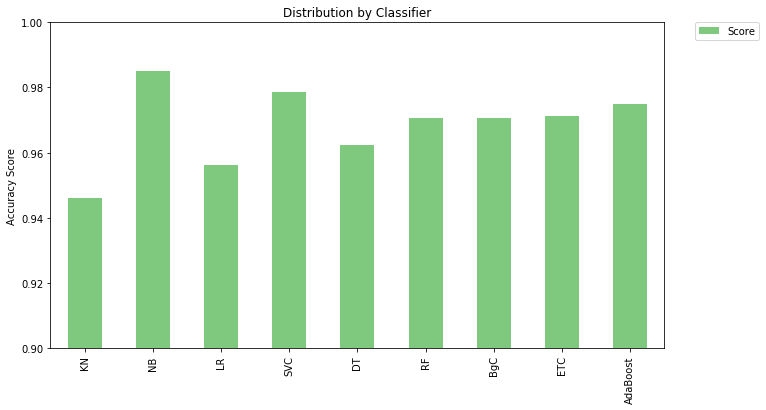

In [56]:
#classifier에 따른 accuracy 히스토그램
df.plot(kind='bar', ylim=(0.9,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)